# Solar Energy Data Analysis
# --------------------------

# ## Introduction
# This notebook performs Exploratory Data Analysis (EDA) on solar energy data. 
# We will cover the following steps:
# 1. Load and clean the data.
# 2. Perform summary statistics.
# 3. Check data quality (missing values, outliers, incorrect entries).
# 4. Conduct time series analysis.
# 5. Explore correlations between variables.
# 6. Analyze wind data and temperature.
# 7. Visualize data distributions and relationships.
# 8. Clean data based on initial findings.

# ## 1. Load and Clean Data

In [4]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Timestamp'])
    return data
data = load_data('../data/benin-malanville.csv')
print(data.head())


            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


Understand the data and its features, its type bu using  info() 


print(data.info())

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [8]:
print(data.describe())


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

In [9]:


missing_values = data.isnull().sum()
print(missing_values)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


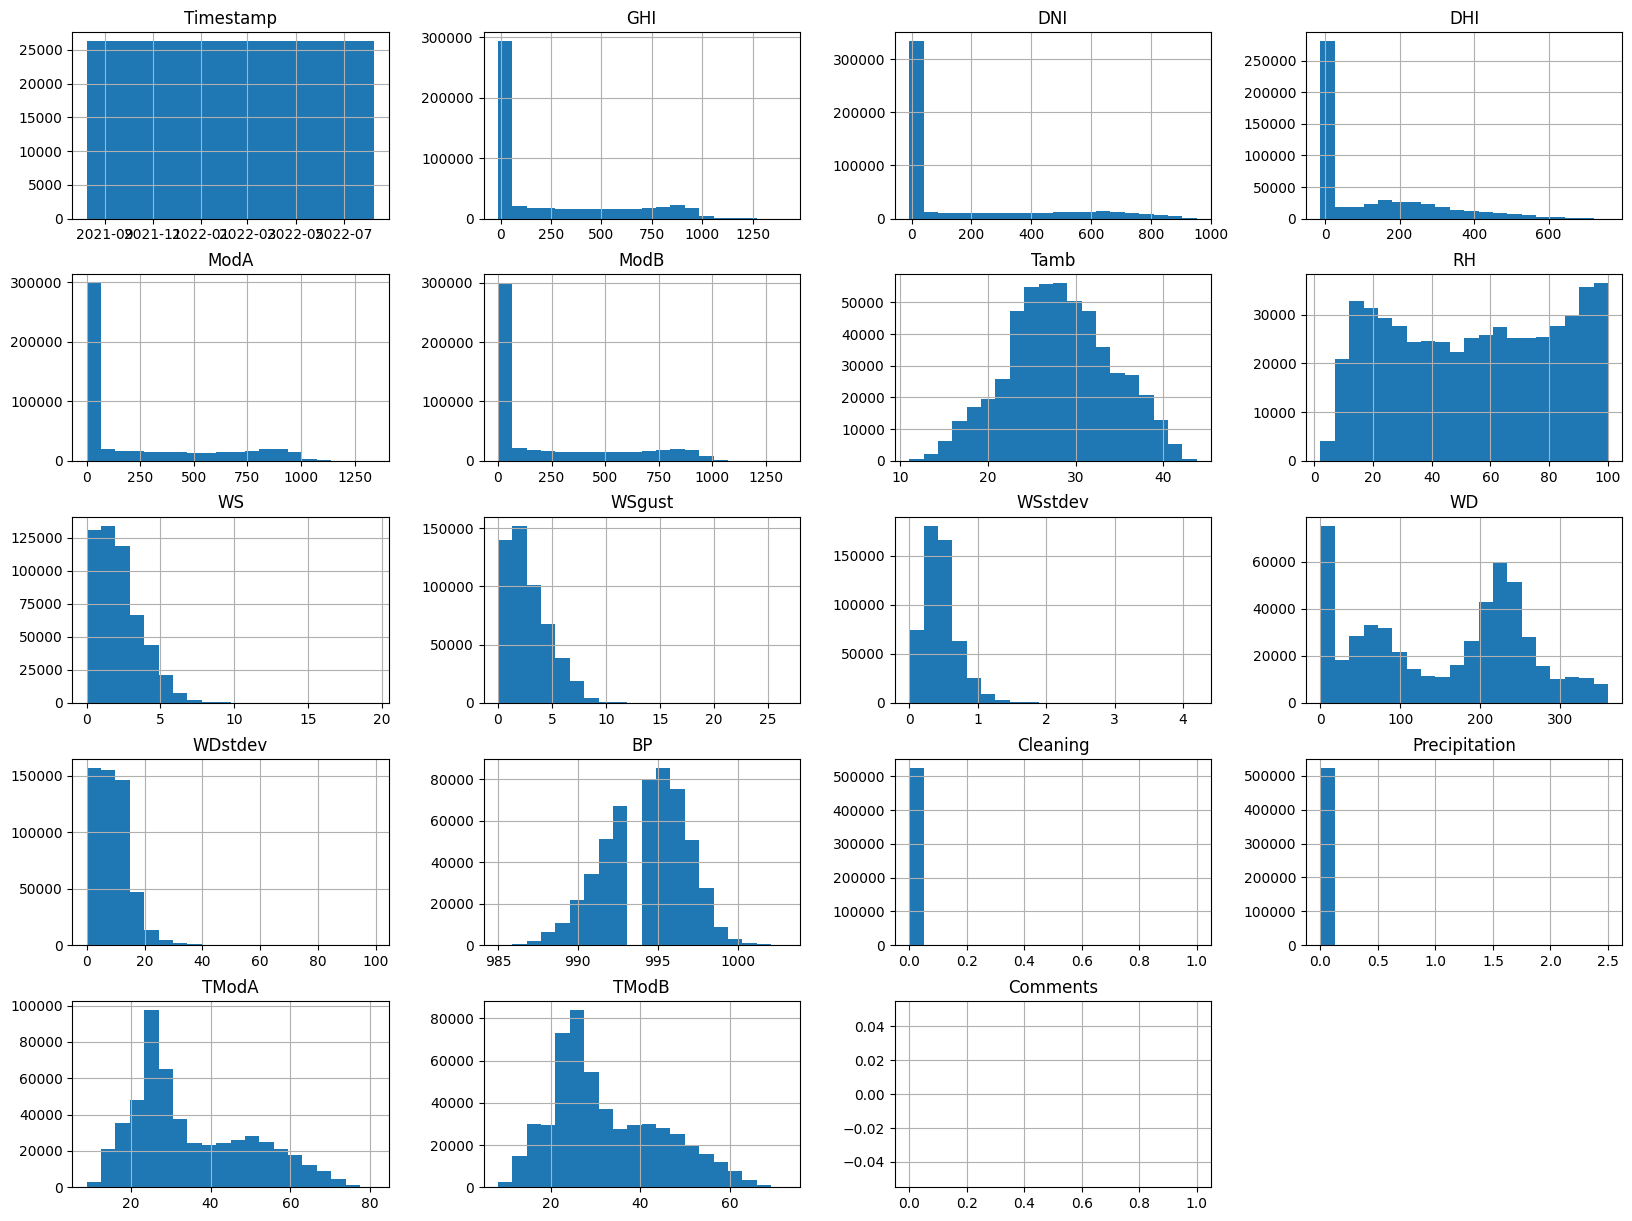

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(bins=20, figsize=(20, 15))
plt.show()


In [15]:
summary_stats = data.describe()
print(summary_stats)


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

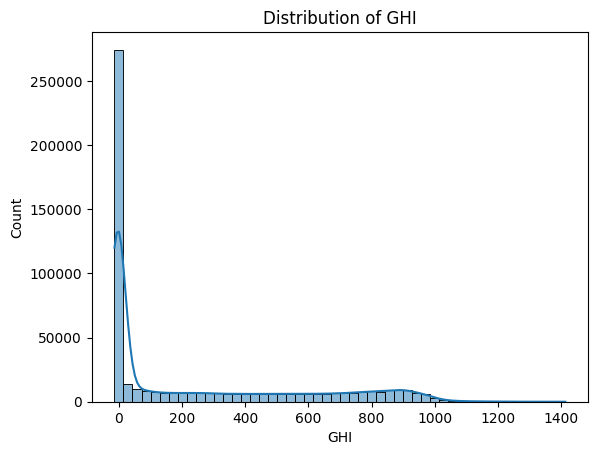

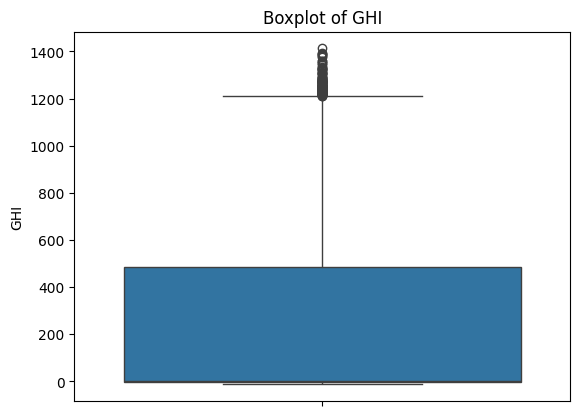

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['GHI'], bins=50, kde=True)
plt.title('Distribution of GHI')
plt.show()

sns.boxplot(data['GHI'])
plt.title('Boxplot of GHI')
plt.show()


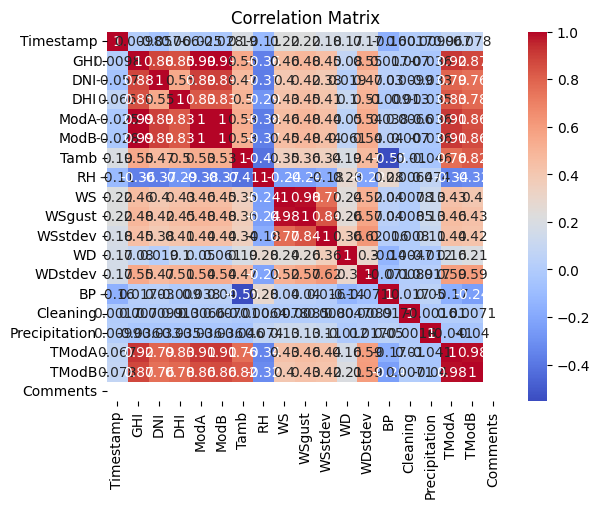

In [18]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


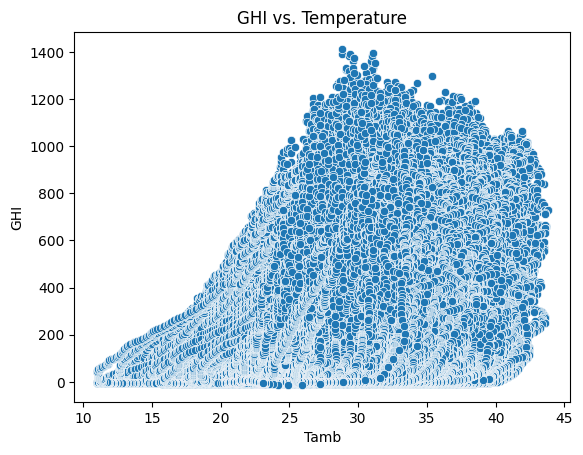

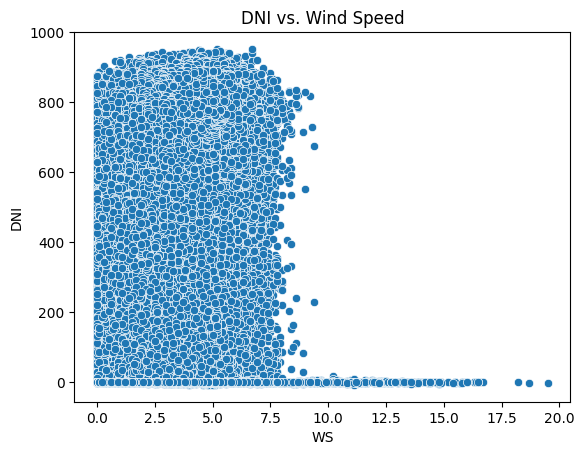

In [19]:
sns.scatterplot(x='Tamb', y='GHI', data=data)
plt.title('GHI vs. Temperature')
plt.show()

sns.scatterplot(x='WS', y='DNI', data=data)
plt.title('DNI vs. Wind Speed')
plt.show()


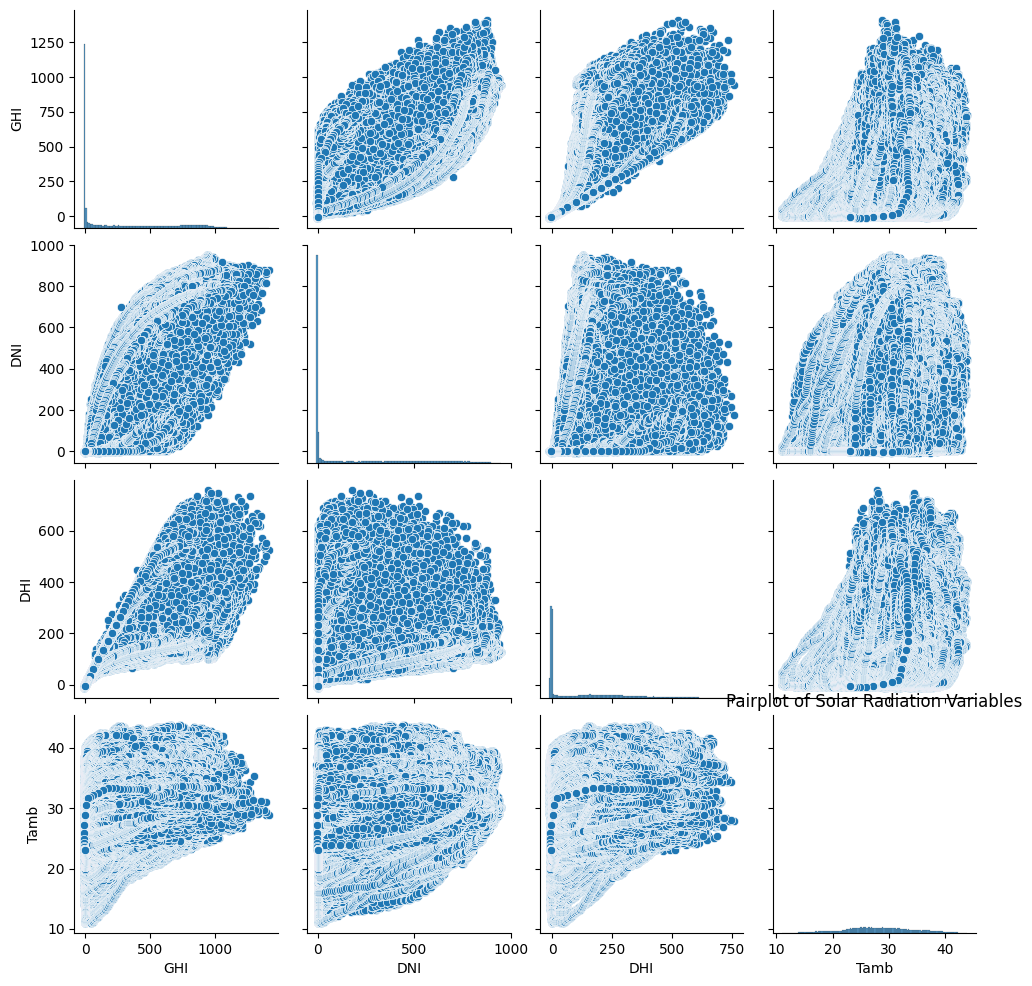

In [20]:
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Pairplot of Solar Radiation Variables')
plt.show()


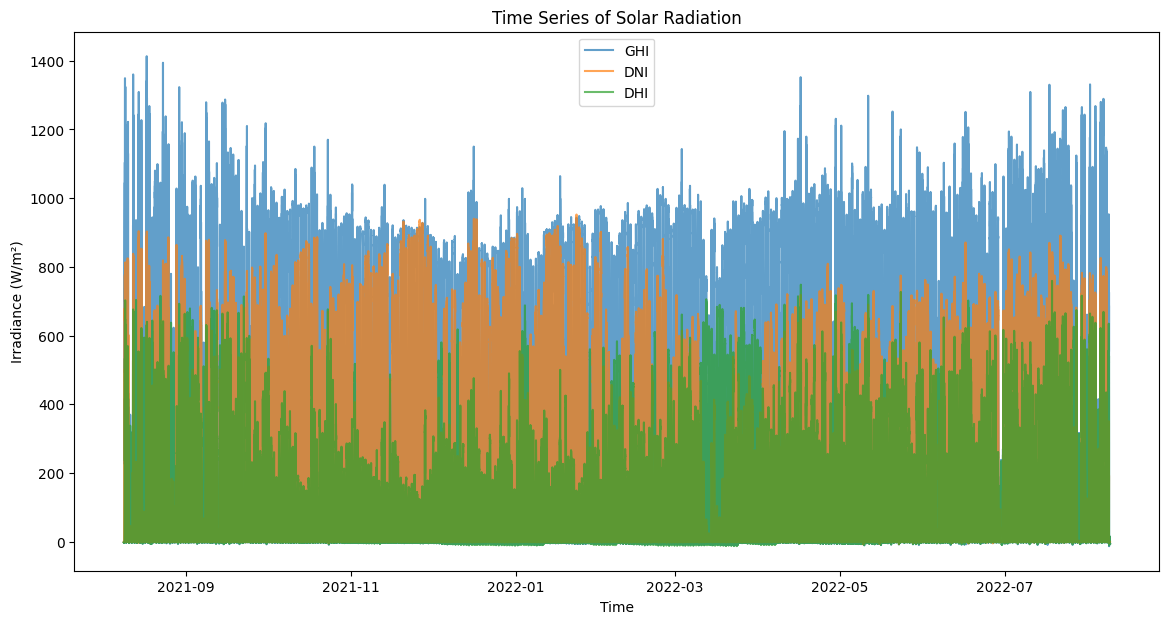

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(data['Timestamp'], data['GHI'], label='GHI', alpha=0.7)
plt.plot(data['Timestamp'], data['DNI'], label='DNI', alpha=0.7)
plt.plot(data['Timestamp'], data['DHI'], label='DHI', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.title('Time Series of Solar Radiation')
plt.legend()
plt.show()


In [23]:
sns.heatmap(data.pivot_table(index='Timestamp', columns='Time', values='GHI'))
plt.title('Heatmap of GHI Over Time')
plt.show()


KeyError: 'Time'

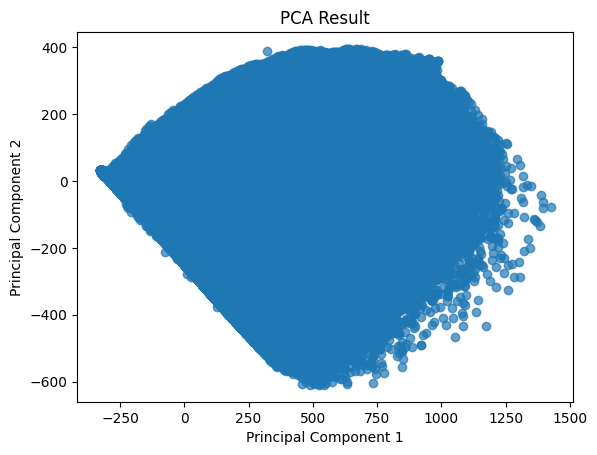

In [24]:
from sklearn.decomposition import PCA

features = data[['GHI', 'DNI', 'DHI', 'Tamb']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


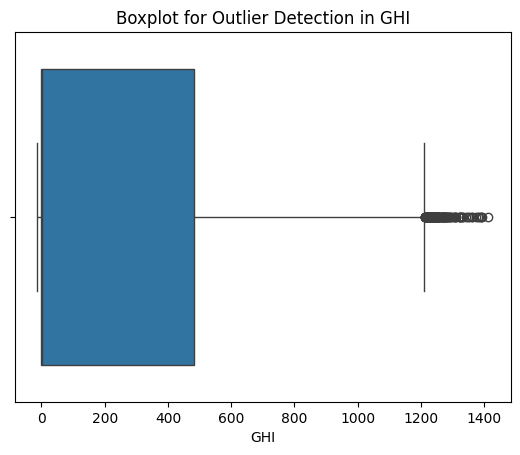

In [25]:
sns.boxplot(x=data['GHI'])
plt.title('Boxplot for Outlier Detection in GHI')
plt.show()


In [27]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data[['GHI', 'DNI', 'DHI']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
clean_data = data[filtered_entries]


In [28]:
data.to_csv('../data/cleaned_dataset.csv', index=False)
